<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/17_4_IMDB_max-88%25ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя знания данного урока, и набор данных IMDB вам необходимо:
1. Спроектировать модель классификации отзывов к фильмам с точностью на валидационной выборке более 90%.
2. Показать, что модель способна классифицировать отзывы с вероятностью более 88% на контрольной выборке.

За успешное выполнение задания вы получите 3 балла. Если сможете преодолеть точность 95% на валидационной выборке и/или 93% на контрольной, то получите 4 балла.

Также вы можете получить дополнительно 1 балл, если выполните все предложенные задания в задаче о Титанике (17.1), проанализируете "увеличенную модель" (17.2).

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=50000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=50000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 10000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(50000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
EPOCHS = 5
BATCH_SIZE = 256
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/10
88/88 [==============================] - 4s 33ms/step - loss: 0.4409 - accuracy: 0.8336 - val_loss: 0.2888 - val_accuracy: 0.8928
Epoch 2/10
88/88 [==============================] - 1s 16ms/step - loss: 0.1831 - accuracy: 0.9432 - val_loss: 0.2575 - val_accuracy: 0.9008
Epoch 3/10
88/88 [==============================] - 1s 16ms/step - loss: 0.1000 - accuracy: 0.9727 - val_loss: 0.2738 - val_accuracy: 0.8956
Epoch 4/10
88/88 [==============================] - 1s 16ms/step - loss: 0.0534 - accuracy: 0.9882 - val_loss: 0.3234 - val_accuracy: 0.8936
Epoch 5/10
88/88 [==============================] - 1s 16ms/step - loss: 0.0282 - accuracy: 0.9951 - val_loss: 0.3582 - val_accuracy: 0.8900
Epoch 6/10
88/88 [==============================] - 1s 16ms/step - loss: 0.0156 - accuracy: 0.9981 - val_loss: 0.3960 - val_accuracy: 0.8920
Epoch 7/10
88/88 [==============================] - 1s 16ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 0.4303 - val_accuracy: 0.8892
Epoch 8/10
88

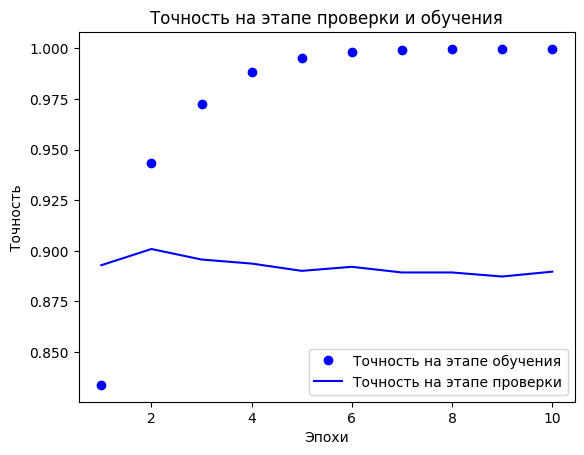

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.show()

Epoch 1/10
88/88 [==============================] - 3s 29ms/step - loss: 0.5926 - accuracy: 0.7027 - val_loss: 0.5256 - val_accuracy: 0.8032
Epoch 2/10
88/88 [==============================] - 1s 14ms/step - loss: 0.4572 - accuracy: 0.8736 - val_loss: 0.4620 - val_accuracy: 0.8688
Epoch 3/10
88/88 [==============================] - 1s 15ms/step - loss: 0.3806 - accuracy: 0.9295 - val_loss: 0.4393 - val_accuracy: 0.8760
Epoch 4/10
88/88 [==============================] - 1s 15ms/step - loss: 0.3269 - accuracy: 0.9595 - val_loss: 0.4276 - val_accuracy: 0.8812
Epoch 5/10
88/88 [==============================] - 1s 15ms/step - loss: 0.2876 - accuracy: 0.9759 - val_loss: 0.4196 - val_accuracy: 0.8848
Epoch 6/10
88/88 [==============================] - 1s 15ms/step - loss: 0.2585 - accuracy: 0.9848 - val_loss: 0.4261 - val_accuracy: 0.8832
Epoch 7/10
88/88 [==============================] - 1s 15ms/step - loss: 0.2350 - accuracy: 0.9893 - val_loss: 0.4473 - val_accuracy: 0.8760
Epoch 8/10
88

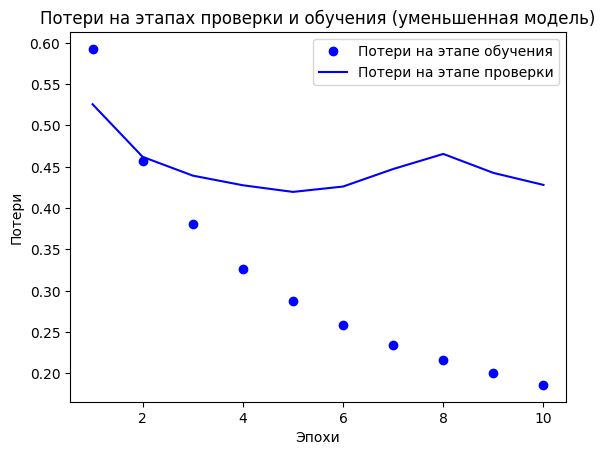

In [ ]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(50000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения (уменьшенная модель)')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Epoch 1/10
88/88 [==============================] - 3s 30ms/step - loss: 0.4584 - accuracy: 0.8441 - val_loss: 0.3323 - val_accuracy: 0.8904
Epoch 2/10
88/88 [==============================] - 1s 15ms/step - loss: 0.2559 - accuracy: 0.9323 - val_loss: 0.3260 - val_accuracy: 0.8964
Epoch 3/10
88/88 [==============================] - 1s 16ms/step - loss: 0.2111 - accuracy: 0.9540 - val_loss: 0.3532 - val_accuracy: 0.8952
Epoch 4/10
88/88 [==============================] - 1s 16ms/step - loss: 0.1884 - accuracy: 0.9652 - val_loss: 0.3695 - val_accuracy: 0.8916
Epoch 5/10
88/88 [==============================] - 1s 16ms/step - loss: 0.1728 - accuracy: 0.9725 - val_loss: 0.4021 - val_accuracy: 0.8880
Epoch 6/10
88/88 [==============================] - 1s 16ms/step - loss: 0.1647 - accuracy: 0.9756 - val_loss: 0.4242 - val_accuracy: 0.8852
Epoch 7/10
88/88 [==============================] - 1s 16ms/step - loss: 0.1626 - accuracy: 0.9766 - val_loss: 0.4541 - val_accuracy: 0.8816
Epoch 8/10
88

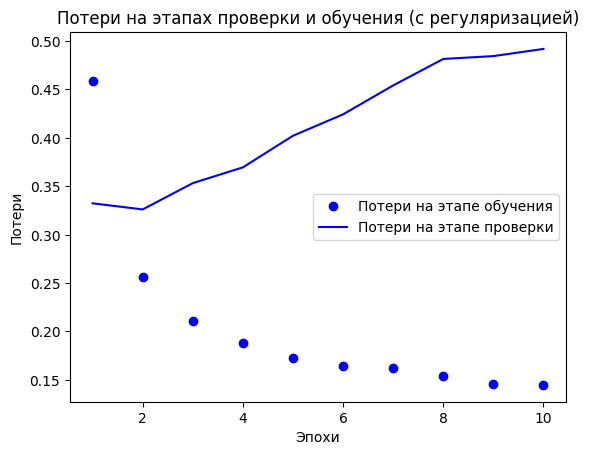

In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',  kernel_regularizer=regularizers.l2(0.001), input_shape=(50000,)))
model.add(layers.Dense(16, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения (с регуляризацией)')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [ ]:
from keras import regularizers
from keras import models
from keras import layers
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(50000,)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=25, batch_size=1000, validation_split=0.1)

history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)

plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['accuracy'], 'bo', color='red', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_accuracy'], 'b', color='red', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения (с прореживанием)')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Точность на этапе обучения = {round((history_dict['accuracy'][-1]*100), 1)} %")
print(f"Точность на этапе проверки = {round((history_dict['val_accuracy'][-1]*100), 1)} %")
print(f"Точность на тестовых данных = {round((test_accuracy*100), 1)} %")